<a href="https://colab.research.google.com/github/seoin-cho/SOLUX_summer_data/blob/master/3%2C4%EC%A3%BC%EC%B0%A8_%EC%BA%90%EA%B8%80/%EC%BA%90%EA%B8%80%EC%8B%A4%EC%8A%B5_6(8_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#노트북 안에 그래프를 그리기 위해
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
train = pd.read_csv('/content/drive/My Drive/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv('/content/drive/My Drive/test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
#4개의 새로운 열 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [ ]:
#test 또한 4개의 새로운 열 생성
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [ ]:
#연속형 feature와 범주형 feature
#범주형 feature의 type을 category로 변경해준다.
categorical_feature_names = ['season', 'holiday', 'workingday', 'weather', 'dayofweek', 'month', 'year', 'hour']

In [ ]:
for var in categorical_feature_names:  #category로 type 변경
  train[var] = train[var].astype('category')  #astype함수를 이용해 type을 변경
  test[var] = test[var].astype('category')

In [ ]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']
feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [ ]:
#선택된 피처를 train 데이터셋에서 가져와서 x_train으로 저장
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [ ]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [ ]:
#train 데이터셋의 count 데이터를 벡터형태로 가져옴
label_name = 'count'
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
#점수 매기는 함수 생성
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):
  if convertExp:
    predicted_values = np.exp(predicted_values),
    actual_values = np.exp(actual_values)
  #넘파이로 배열형태를 바꿔준다.
  predicted_values = np.array(predicted_values)
  actual_values = np.array(actual_values)

  #예측값과 실제값에 1을 더하고 로그를 씌워준다.
  log_predict = np.log(predicted_values + 1)
  log_actual = np.log(actual_values + 1)

  #위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
  difference = log_predict - log_actual
  difference = np.square(difference)

  #평균을 낸다.
  mean_difference = difference.mean()

  #다시 루트를 씌운다.
  score = np.sqrt(mean_difference)

  return score

In [ ]:
#선형회귀 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

#선형회귀 모델을 초기화
lModel = LinearRegression()

#모델을 학습시킨다.
y_train_log = np.log1p(y_train)  #값에 1을 더하고 로그를 씌움
lModel.fit(x_train, y_train_log)

#예측하고 정확도를 평가한다.
preds = lModel.predict(x_train)
print('RMSLE Value For Linear Regression: ', rmsle(np.exp(y_train_log), np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9803697923313522


{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780834


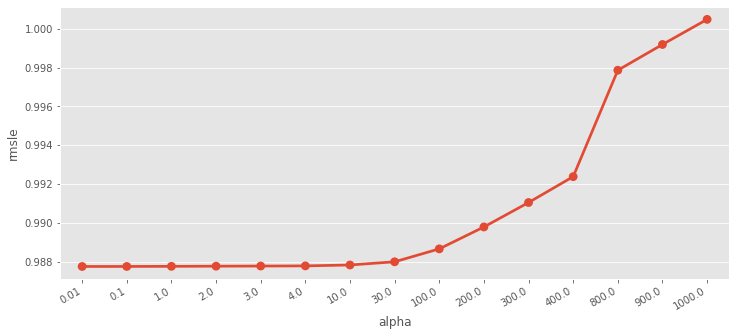

In [ ]:
#릿지 Regularization Model - Ridge
#회귀를 위한 선형모델, 모든 피처가 주는 영향을 최소화, 오버피팅을 방지

#3000번 반복실행하도록 하여 GridSearchCV를 이용해 최적의 alpha값을 찾는다.
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000], 'alpha':[0.01,0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge_m = GridSearchCV(ridge_m_, ridge_params_, scoring=rmsle_scorer, cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit(x_train, y_train_log)
preds = grid_ridge_m.predict(x_train)
print(grid_ridge_m.best_params_)  #최적의 alpha값을 찾는다.
print('RMSLE Value For Ridge Regression: ', rmsle(np.exp(y_train_log), np.exp(preds), False))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x:x['alpha'])
df['rmsle'] =df['mean_test_score'].apply(lambda x: -x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803727821457648


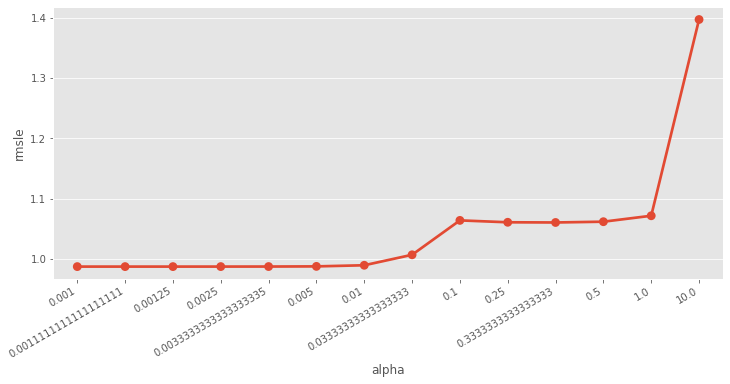

In [ ]:
#라쏘 Regularization Model-Lasso
#계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 한다, 피처 선택이 자동으로 이루어진다, alpha값의 기본값은 1.0이다. 
lasso_m_ = Lasso()

alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_m = GridSearchCV(lasso_m_, lasso_params_, scoring = rmsle_scorer, cv=5)
y_train_log = np.log1p(y_train)  #1을 더하고 로그를 씌워서 x_train과 y_train 값을 학습시킴.
grid_lasso_m.fit(x_train, y_train_log)
preds = grid_lasso_m.predict(x_train)
print(grid_lasso_m.best_params_)  #예측한 최적의 값 프린트
print('RMSLE Value For Lasso Regression: ', rmsle(np.exp(y_train_log), np.exp(preds),False))

fig, ax = plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df['alpha'] = df['params'].apply(lambda x:x['alpha'])
df['rmsle'] = df['mean_test_score'].apply(lambda x:-x)

plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df, x='alpha', y='rmsle', ax=ax)

In [ ]:
#앙상블 모델-랜덤포레스트

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
rfModel.fit(x_train, y_train_log)

preds = rfModel.predict(x_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print('RMSLE Value For Random Forest: ', score)

RMSLE Value For Random Forest:  0.10731264063752279


In [ ]:
#앙상블 모델-그라디언트 부스트
#여러개의 결정트리를 묶어 강력한 모델을 만듦, 메모리를 적게 사용하고 예측이 빠름

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01); #n_estimator의 값이 너무 크면 오버피팅 될 수 있다.

y_train_log = np.log1p(y_train)
gbm.fit(x_train, y_train_log)

preds = gbm.predict(x_train)
score = rmsle(np.exp(y_train_log), np.exp(preds), False)
print("RMSLE Value For Gradient Boost: ", score)  #랜덤포레스트 모델이 점수가 더 높게 나옴.

RMSLE Value For Gradient Boost:  0.21357403727249372


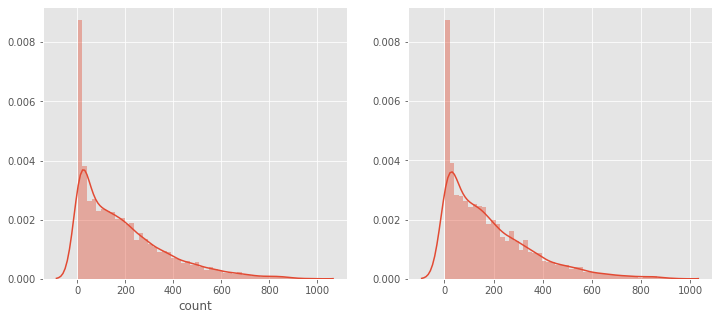

In [ ]:
predsTest = rfModel.predict(x_test)  #점수가 더 높은 rf 모델로 예측해보자.
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=ax1, bins=50)  #train의 count값
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)  #test의 count값

In [ ]:
#submit(랜덤포레스트)
submission = pd.read_csv('/content/drive/My Drive/sampleSubmission.csv')
submission
submission['count'] = np.exp(predsTest)  #처음에 로그를 씌웠기 때문에 다시 지수함수 exp()를 씌워줌.

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.393945
1,2011-01-20 01:00:00,5.141637
2,2011-01-20 02:00:00,4.150963
3,2011-01-20 03:00:00,4.752610
4,2011-01-20 04:00:00,3.846727


In [ ]:
submission.to_csv('/content/drive/My Drive/Score_{0:.5f}_submission.csv'.format(score), index=False)

In [ ]:
131/3242  #rf모델을 사용하였을 때 상위 몇 프로안에 드는지 확인

0.04040715607649599

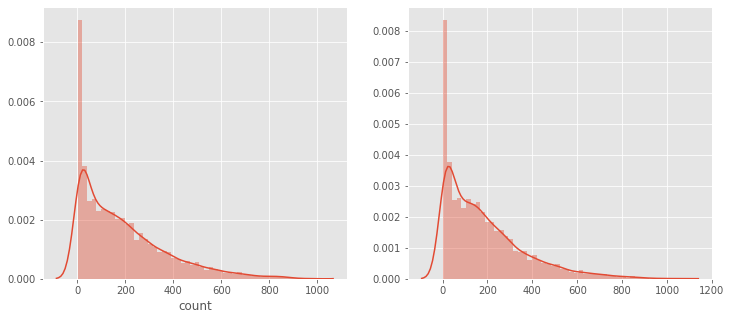

In [ ]:
#submit(GradientBoosting)

predsTest = gbm.predict(x_test)  
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=ax1, bins=50)  #train의 count값
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)  #test의 count값

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/sampleSubmission.csv')
submission
submission['count'] = np.exp(predsTest)  #처음에 로그를 씌웠기 때문에 다시 지수함수 exp()를 씌워줌.

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918


In [ ]:
submission.to_csv('/content/drive/My Drive/Score_{0:.5f}_submission.csv'.format(score), index=False)

In [ ]:
149/3242  #GradientBoosting 모델로 예측하였을 때 상위 몇 프로안에 드는지 확인

0.0459592843923504